# **FILM REVENUE PREDICTOR**

## Objectives

* Answer business requirement 1:
    * The client is interested in understanding the correlation between a film's revenue and the elements that are known prior to the greenlight decision in order to better assess the investment's safety.

## Inputs

* jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App.

---

# Change working directory

Change the working directory 


In [33]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

New directory

In [34]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [35]:
current_dir = os.getcwd()
current_dir

'/workspace'

---

# Load Data


In [36]:
import pandas as pd

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

print(df_new.head().to_string(index=False))

   budget    revenue  runtime  language_encoded  popularity  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  History  Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  Western  crew_Director_Aaron Seltzer  crew_Director_Adam McKay  crew_Director_Adam Shankman  crew_Director_Alejandro González Iñárritu  crew_Director_Alex Proyas  crew_Director_Alexander Payne  crew_Director_Alfonso Cuarón  crew_Director_Alfred Hitchcock  crew_Director_Andrew Adamson  crew_Director_Andrew Niccol  crew_Director_Andrzej Bartkowiak  crew_Director_Andy Fickman  crew_Director_Andy Tennant  crew_Director_Ang Lee  crew_Director_Anne Fletcher  crew_Director_Antoine Fuqua  crew_Director_Atom Egoyan  crew_Director_Barry Levinson  crew_Director_Barry Sonnenfeld  crew_Director_Ben Stiller  crew_Director_Bill Condon  crew_Director_Bobby Farrelly  crew_Director_Brad Anderson  crew_Director_Brad Bird  crew_Director_Brett Ratner  crew_Director_Brian De Palma  cr

---

# Data Exploration

Install Ydata profiling

In [37]:
%pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


# Correlation Study

Correlation between high & low revenue movies 


Number of high revenue movies: 1201
Number of low revenue movies: 1427
Percentage of high revenue movies: 25.01%
Percentage of low revenue movies: 29.71%


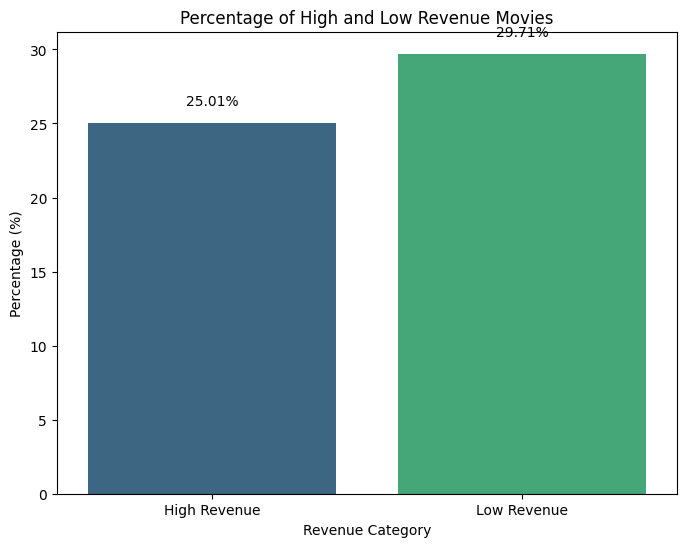

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# High revenue movies 
high_revenue = df_movies[df_movies['revenue'] >= df_movies['revenue'].quantile(0.75)]

# Low revenue movies 
low_revenue = df_movies[df_movies['revenue'] <= df_movies['revenue'].quantile(0.25)]

# Calculate the percentages
total_movies = len(df_movies)
percent_high_revenue = (len(high_revenue) / total_movies) * 100
percent_low_revenue = (len(low_revenue) / total_movies) * 100

# Counts and percentages
print("\nNumber of high revenue movies:", len(high_revenue))
print("Number of low revenue movies:", len(low_revenue))
print(f"Percentage of high revenue movies: {percent_high_revenue:.2f}%")
print(f"Percentage of low revenue movies: {percent_low_revenue:.2f}%")

# Bar plot 
plt.figure(figsize=(8,6))
sns.barplot(x=['High Revenue', 'Low Revenue'], y=[percent_high_revenue, percent_low_revenue], palette='viridis')

# Titles and labels
plt.title('Percentage of High and Low Revenue Movies')
plt.ylabel('Percentage (%)')  # Corrected line
plt.xlabel('Revenue Category')

# Labels 
for i, v in enumerate([percent_high_revenue, percent_low_revenue]):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Save 
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Percentage_Movies_making_a_profit_plot.png', dpi=300, bbox_inches='tight')

# Show 
plt.show()

Revenue outliers

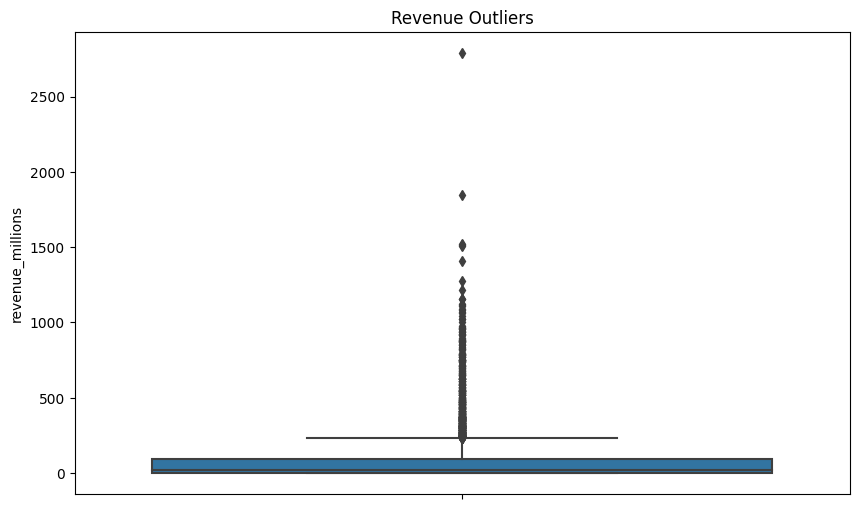

In [39]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Convert budget and revenue to millions 
df_millions = df_new.copy()
df_millions['budget_millions'] = df_millions['budget'] / 1_000_000
df_millions['revenue_millions'] = df_millions['revenue'] / 1_000_000

# Reshape 
df_long = df_millions[['budget_millions', 'revenue_millions']].melt(var_name='Category', value_name='Millions')

# Plot 
plt.figure(figsize=(10,6))
sns.boxplot(y=df_millions['revenue_millions'])
plt.title('Revenue Outliers')

output_dir = '/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures'
os.makedirs(output_dir, exist_ok=True)

# Save 
plt.savefig(os.path.join(output_dir, 'revenue_outliers.png'), dpi=300, bbox_inches='tight')

plt.show()

Profitable movies

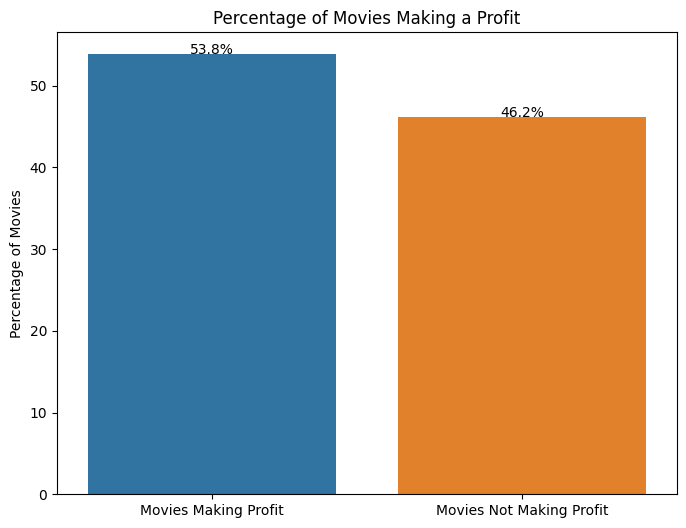

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert budget and revenue to millions and calculate success ratio
df_millions = df_new.copy()
df_millions['budget_millions'] = df_millions['budget'] / 1_000_000
df_millions['revenue_millions'] = df_millions['revenue'] / 1_000_000
df_millions['success_ratio'] = df_millions['revenue_millions'] / df_millions['budget_millions']

# Calculate percentages 
total = len(df_millions)
percent_profitable = (sum(df_millions['success_ratio'] > 1) / total) * 100
percent_not_profitable = 100 - percent_profitable

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Movies Making Profit', 'Movies Not Making Profit'], 
            y=[percent_profitable, percent_not_profitable])
plt.title('Percentage of Movies Making a Profit')
plt.ylabel('Percentage of Movies')

# Add percentage labels on the bars
for i, v in enumerate([percent_profitable, percent_not_profitable]):
    plt.text(i, v, f'{v:.1f}%', ha='center')

# Save the plot as a PNG file
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Profitable_movies.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Crrelation matrix 



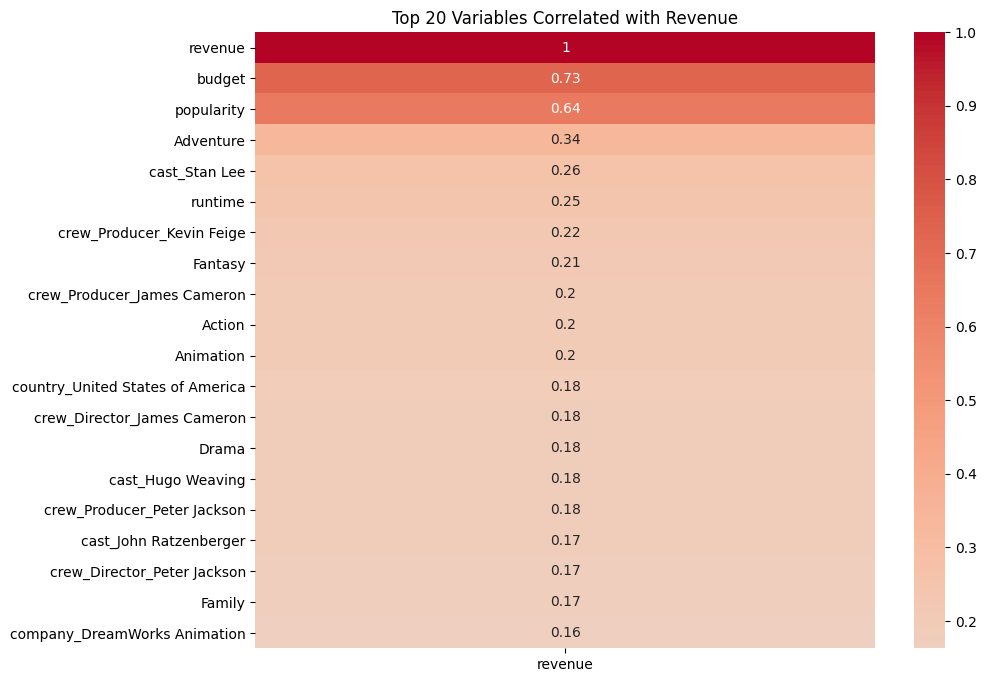

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Correlation matrix
correlation_matrix = df_new.corr()

# Top 20 variables most correlated with revenue
top_20_corr = correlation_matrix[['revenue']].abs().sort_values(by='revenue', ascending=False).head(20)

# Plot heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(top_20_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Top 20 Variables Correlated with Revenue')

os.makedirs('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures', exist_ok=True)
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/before_greenlight_correlations_study.png', bbox_inches='tight')

plt.show()

Correlation Budget & Revenue

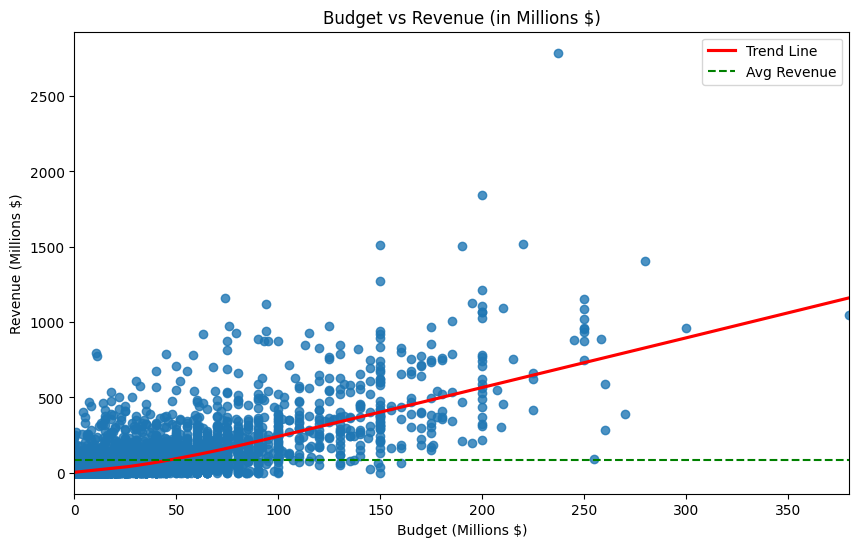

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Convert budget and revenue to millions 
df_millions = df_new.copy() 

df_millions['budget_millions'] = df_millions['budget'] / 1_000_000  
df_millions['revenue_millions'] = df_millions['revenue'] / 1_000_000 

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_millions, x='budget_millions', y='revenue_millions',
           scatter=True, lowess=True,
           line_kws={'color': 'red', 'label': 'Trend Line'})
plt.axhline(y=df_millions['revenue_millions'].mean(),
           color='green', linestyle='--', label='Avg Revenue')
plt.title('Budget vs Revenue (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.legend()

#Save
os.makedirs('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures', exist_ok=True)
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/budget_vs_revenue.png', bbox_inches='tight')

#Show
plt.show()


Correlation Genres & Revenue

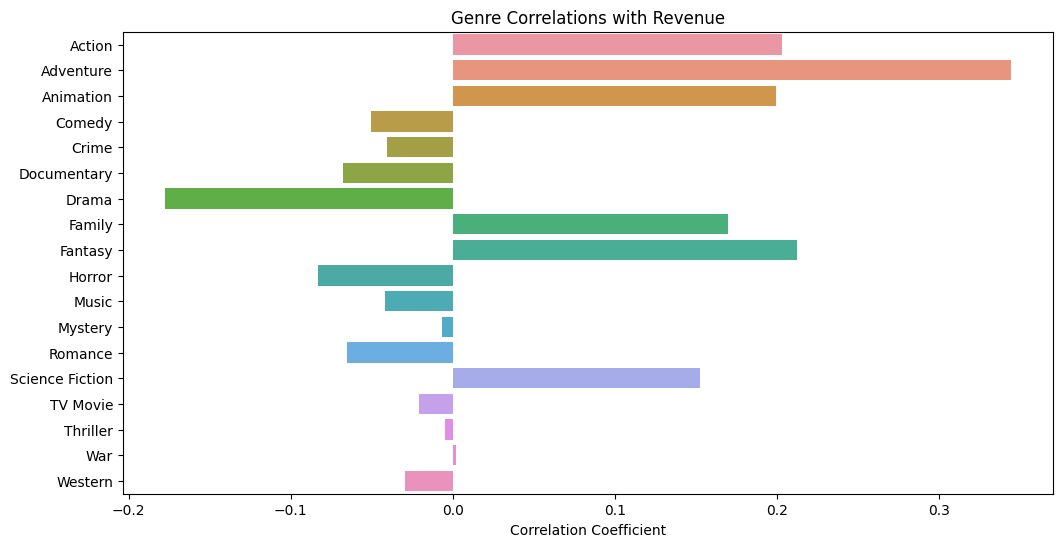

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']

plt.figure(figsize=(12, 6))
genre_correlations = df_new[genre_columns + ['revenue']].corr()['revenue'][:-1]
sns.barplot(x=genre_correlations.values, y=genre_correlations.index)
plt.title('Genre Correlations with Revenue')
plt.xlabel('Correlation Coefficient')

# Save the plot to a file
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Genre_ Revenue_corr.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()

Most produced genres

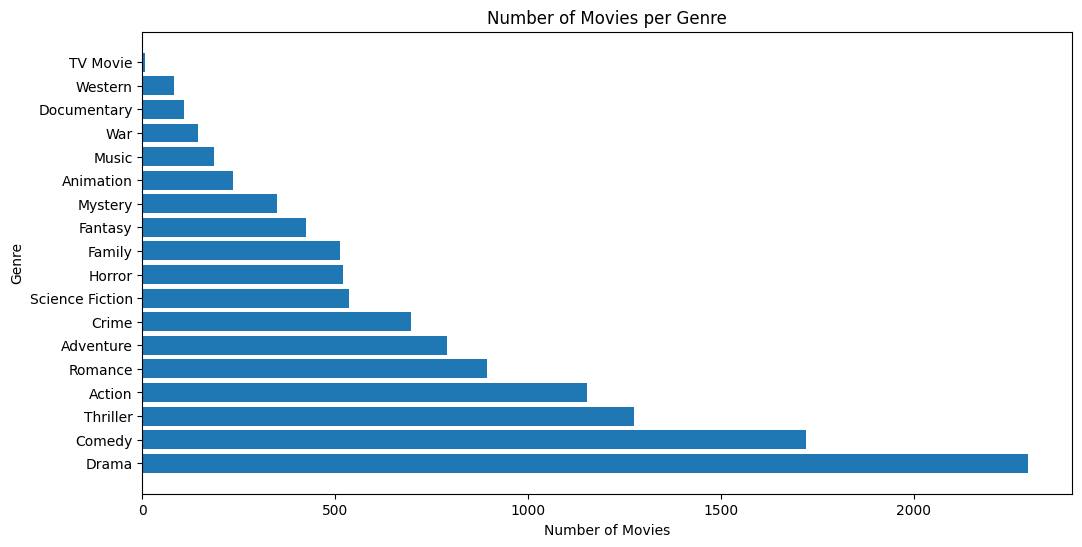

In [44]:

import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
genre_totals = df_new[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                        'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
                        'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                        'Thriller', 'War', 'Western']].sum().sort_values(ascending=False)

plt.barh(genre_totals.index, genre_totals.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Genre_produced.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()

Correlation Language & Revenue

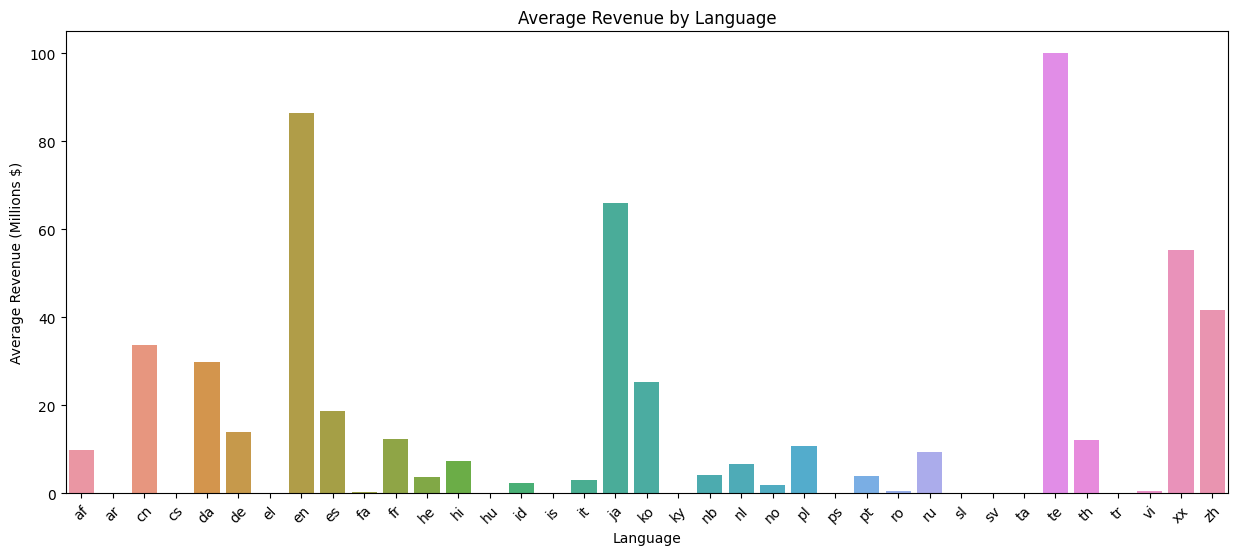

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

df_movies = pd.read_csv('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/datasets/collection/merged_movie_data.csv')

plt.figure(figsize=(15, 6))
df_movies['original_language'] = df_movies['original_language'].fillna('unknown')

lang_revenue = df_movies.groupby('original_language')['revenue'].mean() / 1000000

sns.barplot(x=lang_revenue.index, y=lang_revenue.values)
plt.title('Average Revenue by Language')
plt.xlabel('Language')
plt.ylabel('Average Revenue (Millions $)')
plt.xticks(rotation=45)

plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/Language_revenue_corr.png', 
            dpi=300, 
            bbox_inches='tight')

plt.show()

Correlation Runtime & Revenue

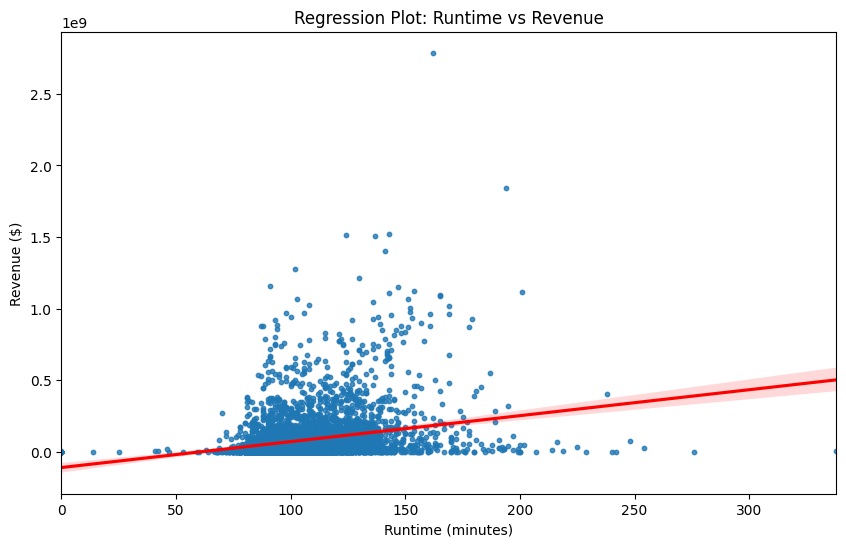

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'runtime' and 'revenue' columns
if 'runtime' in df_new.columns and 'revenue' in df_new.columns:
    
    # Create a regression plot to visualize the relationship between runtime and revenue
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df_new, x='runtime', y='revenue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    plt.title('Regression Plot: Runtime vs Revenue')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Revenue ($)')

    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/runtime_revenue.png', bbox_inches='tight')
    
    plt.show()

else:
    print("Columns 'runtime' and/or 'revenue' are missing from the dataset.")


Correlation Production Company & Revenue

company_DreamWorks Animation                      0.162864
company_Walt Disney Pictures                      0.162131
company_Amblin Entertainment                      0.153435
company_Legendary Pictures                        0.130251
company_Twentieth Century Fox Film Corporation    0.127386
company_Warner Bros.                              0.117564
company_Jerry Bruckheimer Films                   0.106302
company_Dune Entertainment                        0.103802
company_TSG Entertainment                         0.102065
company_Paramount Pictures                        0.094080
company_Ingenious Film Partners                   0.091120
company_Universal Pictures                        0.088304
company_DreamWorks SKG                            0.079250
company_Columbia Pictures                         0.076985
company_Village Roadshow Pictures                 0.067391
company_Original Film                             0.059832
company_Eon Productions                           0.0588

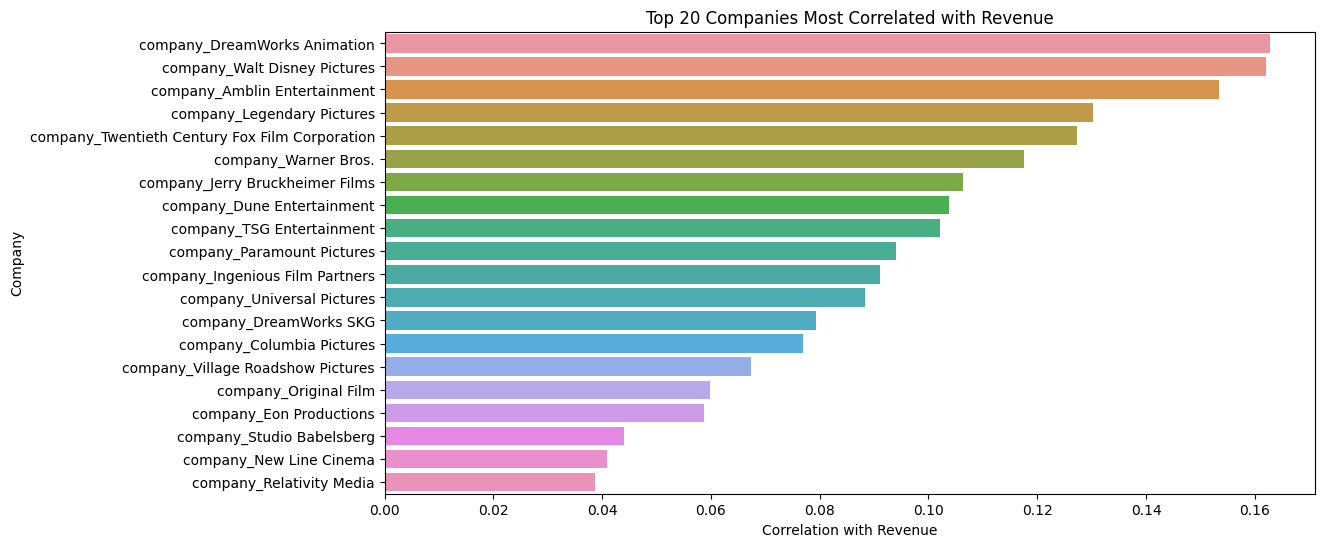

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'company_' (company columns)
    company_columns = [col for col in df_new.columns if col.startswith('company_')]

    # Calculate the correlation between each company column and 'revenue'
    company_revenue_correlations = df_new[company_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    company_revenue_sorted = company_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated companies
    print(company_revenue_sorted.head(20))  # Top 20 companies with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each company with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=company_revenue_sorted.head(20).values, y=company_revenue_sorted.head(20).index)
    plt.title('Top 20 Companies Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Company')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/company_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'company' is missing from the dataset.")


Correlation Production Country & Revenue

                             Country  Correlation with Revenue
10  country_United States of America                  0.182910
9             country_United Kingdom                  0.029201
2                      country_China                  0.022864
7                      country_Japan                  0.004940
0                  country_Australia                  0.004297
4                    country_Germany                 -0.006108
6                      country_Italy                 -0.021714
5                      country_India                 -0.024874
8                      country_Spain                 -0.031597
1                     country_Canada                 -0.035591
3                     country_France                 -0.057374


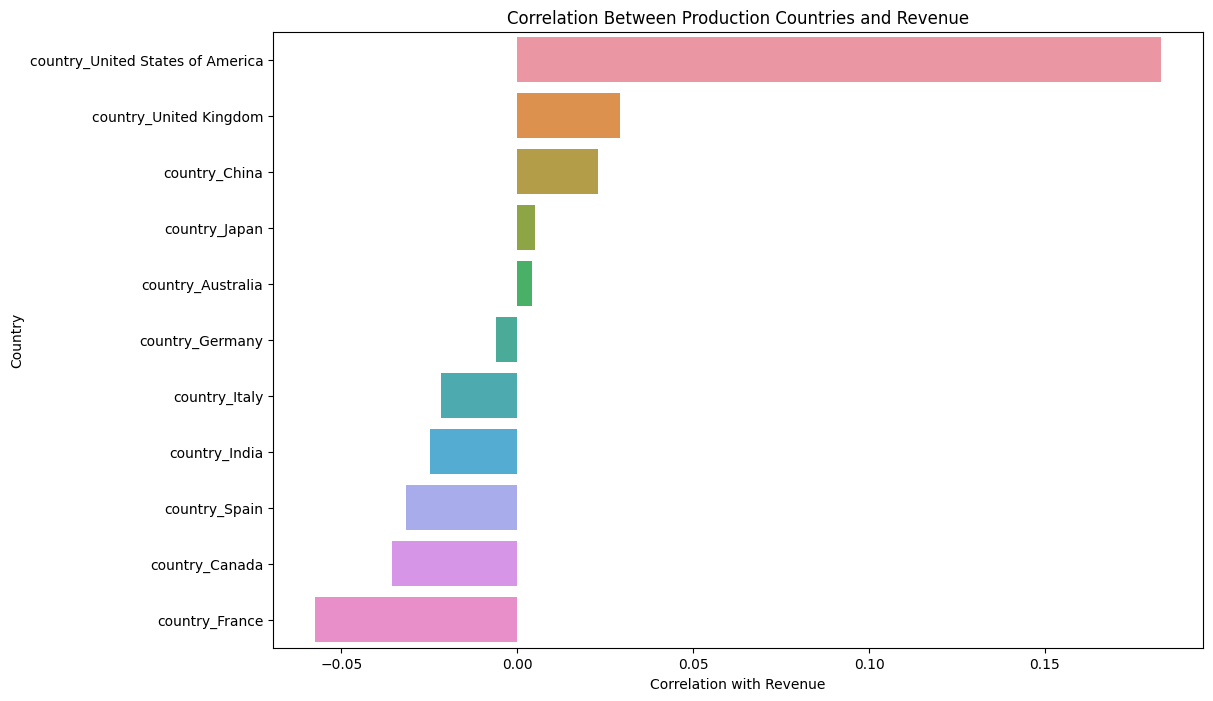

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

if 'revenue' in df_new.columns:
    
    # Sll columns related to 'country_'
    country_columns = [col for col in df_new.columns if col.startswith('country_')]

    # Correlation for each country column with 'revenue'
    country_revenue_corr = df_new[country_columns + ['revenue']].corr()['revenue'][:-1]

    # Store correlations
    correlation_df = pd.DataFrame({
        'Country': country_columns,
        'Correlation with Revenue': country_revenue_corr.values
    })

    # Sort the correlations 
    correlation_df_sorted = correlation_df.sort_values(by='Correlation with Revenue', ascending=False)

    # Display the results
    print(correlation_df_sorted)

    # Bar plot 
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Correlation with Revenue', y='Country', data=correlation_df_sorted)
    plt.title('Correlation Between Production Countries and Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Country')
    
    # Save 
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/country_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation Above The Line Creatives & Revenue

      Group  Correlation with Revenue
0      Cast                  0.030471
3  Producer                  0.014613
1  Director                  0.013666
2    Writer                  0.001889


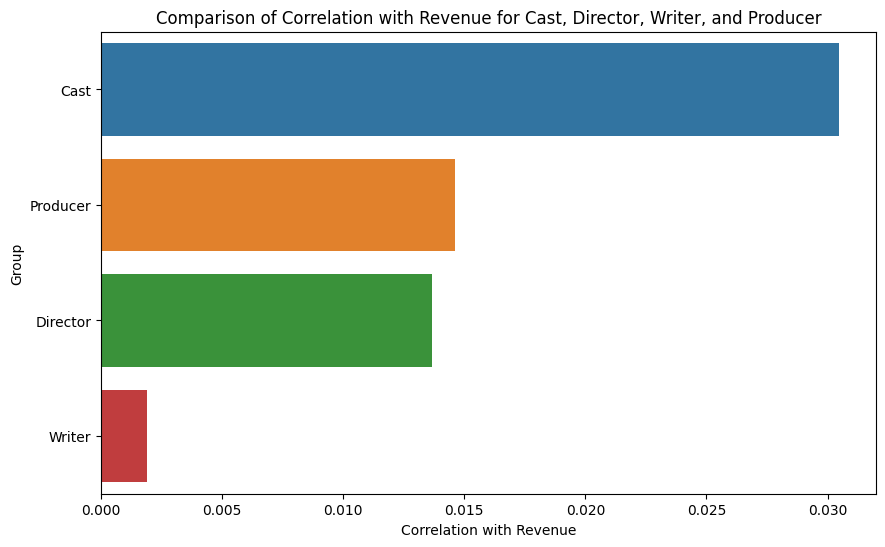

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

if 'revenue' in df_new.columns:
    
    # All columns related to 'cast_', 'crew_director', 'crew_writer', 'crew_producer'
    cast_columns = [col for col in df_new.columns if col.startswith('cast_')]
    director_columns = [col for col in df_new.columns if col.startswith('crew_Director')]
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Correlation for each group with 'revenue'
    cast_revenue_corr = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of cast
    director_revenue_corr = df_new[director_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of directors
    writer_revenue_corr = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of writers
    producer_revenue_corr = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of producers

    # DataFrame to compare correlation 
    correlation_comparison = pd.DataFrame({
        'Group': ['Cast', 'Director', 'Writer', 'Producer'],
        'Correlation with Revenue': [cast_revenue_corr, director_revenue_corr, writer_revenue_corr, producer_revenue_corr]
    })

    # Correlation with revenue
    correlation_comparison_sorted = correlation_comparison.sort_values(by='Correlation with Revenue', ascending=False)

    # Display the results
    print(correlation_comparison_sorted)

    # Bar plot 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Correlation with Revenue', y='Group', data=correlation_comparison_sorted)
    plt.title('Comparison of Correlation with Revenue for Cast, Director, Writer, and Producer')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Group')
    
    # Save 
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/most_important_abovetheline_creatives_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation Cast & Revenue

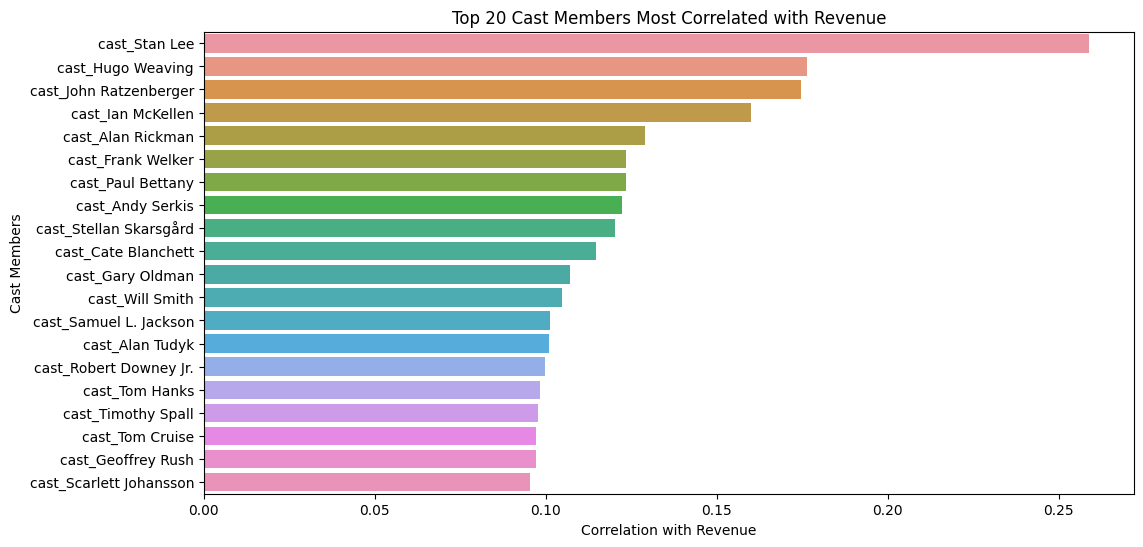

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Columns related to 'cast_' 
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Correlation between each cast member and 'revenue'
cast_revenue_correlations = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

# Correlations in descending order 
top_20_cast_revenue = cast_revenue_correlations.sort_values(ascending=False).head(20)

# Bar plot t
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_revenue.values, y=top_20_cast_revenue.index)
plt.title('Top 20 Cast Members Most Correlated with Revenue')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Cast Members')

# Save 
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/cast_revenue.png', bbox_inches='tight')

# Show the plot
plt.show()


Correlation Cast & Popularity

cast_Samuel L. Jackson    67
cast_Robert De Niro       57
cast_Bruce Willis         51
cast_Matt Damon           48
cast_Morgan Freeman       46
cast_Steve Buscemi        43
cast_Liam Neeson          41
cast_Owen Wilson          40
cast_Johnny Depp          40
cast_Alec Baldwin         39
cast_Nicolas Cage         39
cast_John Goodman         39
cast_Stanley Tucci        38
cast_Jim Broadbent        38
cast_Brad Pitt            38
cast_Willem Dafoe         38
cast_Paul Giamatti        37
cast_Will Ferrell         37
cast_Richard Jenkins      36
cast_Susan Sarandon       36
dtype: int64


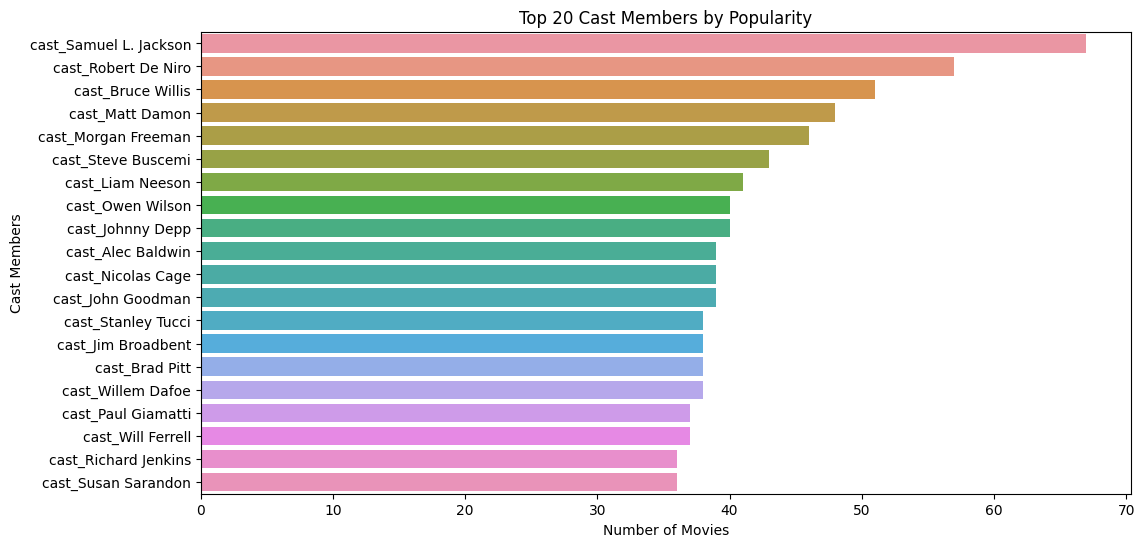

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# All columns related to 'cast_' 
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Calculate the popularity score 
cast_popularity = df_new[cast_columns].sum()

# Cast members by their popularity score 
top_20_cast_by_popularity = cast_popularity.sort_values(ascending=False).head(20)

# Top 20 cast members by popularity
print(top_20_cast_by_popularity)

# Bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_by_popularity.values, y=top_20_cast_by_popularity.index)
plt.title('Top 20 Cast Members by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Cast Members')

# Save 
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/cast_popularity.png', bbox_inches='tight')

# Show the plot
plt.show()

Correlation Directors & Revenue

crew_Director_James Cameron        0.177895
crew_Director_Peter Jackson        0.170240
crew_Director_Michael Bay          0.124094
crew_Director_Steven Spielberg     0.118439
crew_Director_George Lucas         0.116082
crew_Director_Christopher Nolan    0.111914
crew_Director_Francis Lawrence     0.100751
crew_Director_Carlos Saldanha      0.094434
crew_Director_Gore Verbinski       0.087178
crew_Director_Andrew Adamson       0.087048
crew_Director_Eric Darnell         0.079988
crew_Director_Chris Columbus       0.075442
crew_Director_John Lasseter        0.073137
crew_Director_Roland Emmerich      0.072071
crew_Director_Sam Mendes           0.071643
crew_Director_Brad Bird            0.070209
crew_Director_Jon Favreau          0.069687
crew_Director_Bryan Singer         0.067412
crew_Director_Zack Snyder          0.063688
crew_Director_Robert Zemeckis      0.062038
Name: revenue, dtype: float64


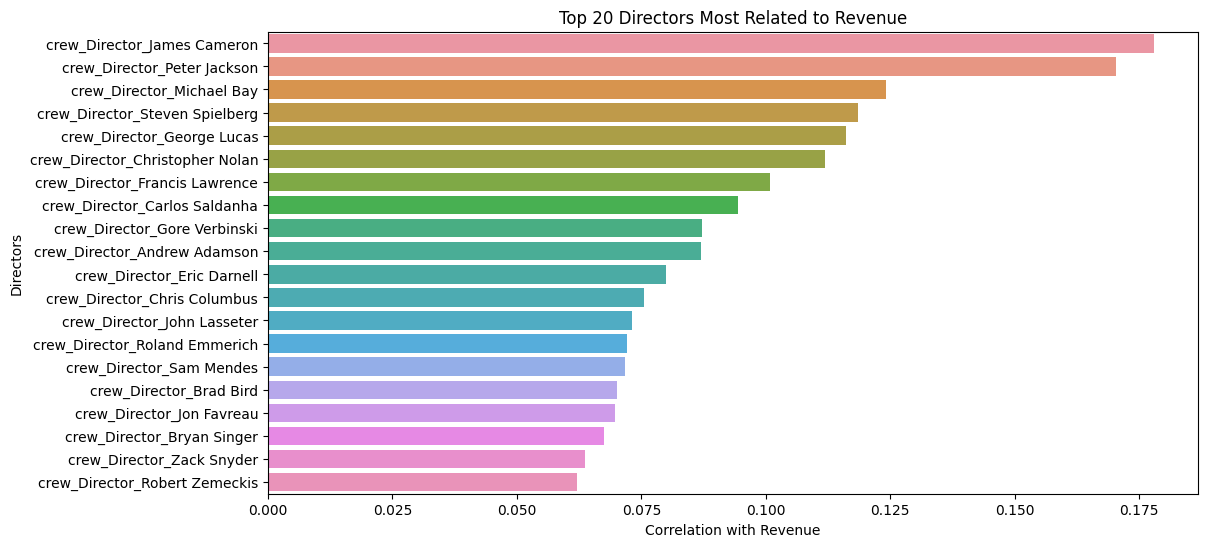

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

if 'revenue' in df_new.columns:
    
    # All columns related to crew_director 
    director_columns = [col for col in df_new.columns if 'crew_Director' in col]

    # Correlation between the crew_director and 'revenue'
    director_correlations = df_new[director_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

    # Sort top directors
    top_20_directors = director_correlations.sort_values(ascending=False).head(20)
    print(top_20_directors)

    # Bar plot 
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_20_directors.values, y=top_20_directors.index)
    plt.title('Top 20 Directors Most Related to Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Directors')

    # Save 
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/directors_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation Writers & Revenue

crew_Writer_M. Night Shyamalan    0.054627
crew_Writer_Quentin Tarantino     0.018406
crew_Writer_Luc Besson            0.007593
crew_Writer_Ethan Coen           -0.002847
crew_Writer_Joel Coen            -0.002847
crew_Writer_Robert Rodriguez     -0.004798
crew_Writer_Woody Allen          -0.004891
crew_Writer_David Zucker         -0.007456
crew_Writer_Tyler Perry          -0.008354
crew_Writer_Kevin Smith          -0.013274
crew_Writer_Mike Leigh           -0.015382
Name: revenue, dtype: float64


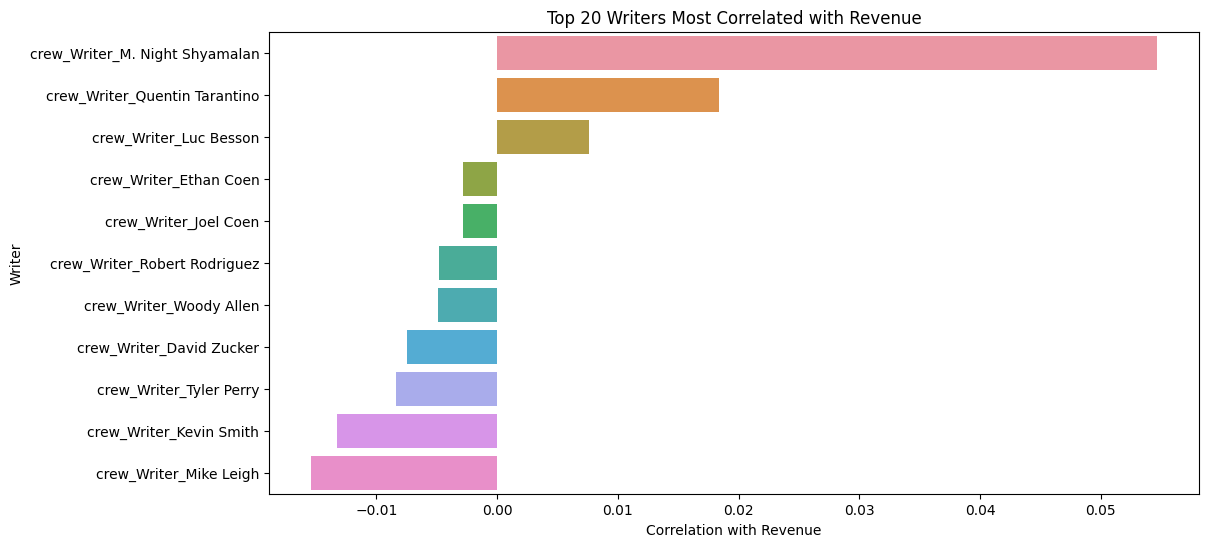

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')


if 'revenue' in df_new.columns:
    
    # Columns related to 'crew_Writer_' 
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]

    # Correlation 'revenue'
    writer_revenue_correlations = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort order
    writer_revenue_sorted = writer_revenue_correlations.sort_values(ascending=False)
    
    # Top writers
    print(writer_revenue_sorted.head(20))  # Top 20 writers with highest correlation to revenue

    # Bar plot 
    plt.figure(figsize=(12, 6))
    sns.barplot(x=writer_revenue_sorted.head(20).values, y=writer_revenue_sorted.head(20).index)
    plt.title('Top 20 Writers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Writer')
    
    # Save 
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/writer_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'crew_Writer' is missing from the dataset.")


Correlation Producers & Revenue

crew_Producer_Kevin Feige             0.223183
crew_Producer_James Cameron           0.204380
crew_Producer_Peter Jackson           0.175474
crew_Producer_David Heyman            0.159591
crew_Producer_Christopher Nolan       0.140052
crew_Producer_Emma Thomas             0.139461
crew_Producer_Ian Bryce               0.133469
crew_Producer_Fran Walsh              0.125595
crew_Producer_Barbara Broccoli        0.125268
crew_Producer_Carolynne Cunningham    0.120186
crew_Producer_Don Murphy              0.114650
crew_Producer_Michael G. Wilson       0.113627
crew_Producer_Rick McCallum           0.112528
crew_Producer_Avi Arad                0.110848
crew_Producer_Barrie M. Osborne       0.109508
crew_Producer_Lorne Orleans           0.108747
crew_Producer_Frank Marshall          0.108308
crew_Producer_Jerry Bruckheimer       0.104036
crew_Producer_Charles Roven           0.102493
crew_Producer_Laura Ziskin            0.096753
Name: revenue, dtype: float64


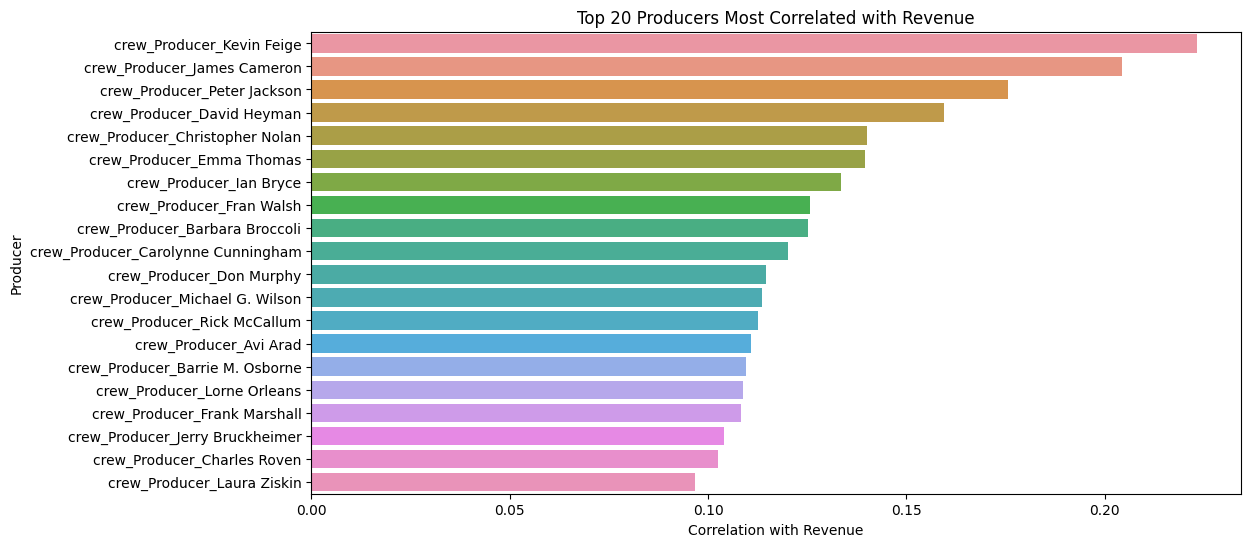

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')


if 'revenue' in df_new.columns:
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Correlation producer 'revenue'
    producer_revenue_correlations = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort order
    producer_revenue_sorted = producer_revenue_correlations.sort_values(ascending=False)
    
    # Top  producers
    print(producer_revenue_sorted.head(20))  # Top 20 producers with highest correlation to revenue

    # Bar plot 
    plt.figure(figsize=(12, 6))
    sns.barplot(x=producer_revenue_sorted.head(20).values, y=producer_revenue_sorted.head(20).index)
    plt.title('Top 20 Producers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Producer')
    
    # Save
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/producer_revenue.png', bbox_inches='tight')

    # Show 
    plt.show()

else:
    print("Column 'revenue' or 'crew_Producer' is missing from the dataset.")


---

# Conclusions 

1. **The Variables Known Only AFTER a Film is Produced Are Key to Film Revenue**:
   After a film is produced, several variables become important in predicting revenue, such as **vote count popularity**, **vote average**, and audience engagement. Despite these factors being accessible post-production, they suggest that **films remain a risky investment**. Producers have limited control over these elements, making it harder to predict revenue with certainty.

2. **The Variables Knows Prior to Greenlight**:
   For data accessible to the producer **before** production, the most influential factors for predicting revenue include **budget**, **popularity of the elements attached**, **genre**, **cast**, **runtime**,**production country**,**producer** and the **director**. These factors seem to have a more direct and predictable impact on the success of the film.

3. **Budget vs Low Budget Films**:
  Only 25% of movies have a **high budget**, yet films with larger budgets tend to generate **higher box office**, indicating that producers need to carefully balance investment and expected return. However, this also makes the industry more prone to financial **risk**.

   Around 29% of movies fall into the **low budget** category, highlighting that films with limited budgets often generate **low revenue**. Despite the increased risks associated with low-budget films, there may still be **outliers that perform exceptionally well**, driven by factors such as creative talent, marketing strategies, or audience appeal.

3. **Budget-Driven Success**:
   Only 25% of movies have a **high budget**, yet these films tend to have a higher revenue and a higher likelihood of performing well at the box office.
   There is a strong correlation between **higher budgets** and higher revenue. Films with larger budgets tend to perform better at the box office, indicating that producers need to carefully balance investment and expected return. However, this also makes the industry more prone to financial risk.

4. **Profitability in the Film Industry**:
    Only **53%** of movies make a profit, which highlights the inherent risks of investing in film production. This aligns with the challenges faced by producers in trying to predict a film's commercial success accurately.

5. **Impact of Genre on Revenue**:
   Certain genres perform significantly better than others in terms of revenue. **Adventure** films are the most profitable, followed by **Fantasy**. Genres like **Drama** tend to underperform at the box office, showing that genre choice plays a key role in the film's commercial success. There appears to be a correlation between the **most produced genres** and **lower box** office performance. For example, Drama, which is the most frequently produced genre, also performs the worst at the box office, suggesting an **oversaturated market**. This indicates that investing in less frequently produced genres, such as Fantasy, could be a wiser choice, as they tend to perform significantly better in terms of revenue.
   
6. **Language and Revenue**:
   Language appears to have less impact on revenue overall, but films in **English**, **Japanese**, **Indian**, and **Chinese** languages tend to perform significantly better then films in other languages. This highlights the global appeal of these languages in the film industry.

7. **Runtime and Revenue**:
   **Runtime** seems to have a significant impacts on revenue. Films with runtimes between **100 and 130 minutes** tend to perform best at the box office. This suggests an optimal film length for audience engagement, balancing pacing and content depth.

8.  **Film Companies' Role in Revenue**:
    Major film studios tend to have a high correlation with revenue. However, surprisingly, some **independent and artistic companies** like **Eon Productions** and **Relativity** also show strong links to film success, demonstrating that financial backing and creative risk-taking can lead to profitability.

9.  **Impact of Country on Revenue**:
    The country strongest linked to high revenue production is **United States**. Clearly  reflecting the dominance of United States in the global film industry.

10. **The Importance of Cast in Film Revenue**:
    Among the "above the line" functions, **cast** plays the most crucial role in determining a film's revenue. A strong cast can drive audience engagement, especially when the actors are associated with successful franchises or high-budget films.

11. **Actor Influence on Revenue**:
    The relationship between cast and revenue is more complex than just hiring the most popular actors. While actors like **Jack Nicholson**, **Robert De Niro**, and **Bruce Willis** are highly popular, actors like **Stan Lee**, **Hugo Weaving**, and **John Ratzenberger** show a stronger correlation with revenue, likely due to the sheer volume of films they've been involved with and their association with higher-budget production. 
    
    **Yet, popularity of cast and crew is one of the key factors driving revenue.**

12. **Director Impact**:
   The "above the line" crew, particularly directors, significantly impacts revenue. Renowned directors like **James Cameron**, **Peter Jackson**, **Michael Bay**, and **Steven Spielberg** consistently top the list of most successful directors, suggesting that their involvement increases a film's likelihood of high revenue.

13. **Producers and Revenue**:
   "Producers also have a **significant correlation with revenue**, with notable names such as **Kevin Feige, James Cameron, and Peter Jackson** often serving as the primary driving force behind a film's success. This highlights the critical importance of a producer’s track record in predicting a film’s financial performance."

14. **Writers' Influence on Revenue**:
    Writers have a more **complex relationship with revenue**. Highly successful writers such as **M. Night Shyamalan and Quentin Tarantino** show a strong correlation with high revenue, whereas even well-known writers like Woody Allen exhibit a negative relationship with revenue despite their popularity. Since the film itself is a reflection of the writer's work, this suggests that the connection between a writer and revenue is more intricate and requires a deeper, separate analysis.

---